## Bank Telemarketing Campaign Case Study.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

#### Importing the libraries.

In [258]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [259]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

#### Read in the Data set. 

In [262]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv")

In [263]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

#### Reading the file without unnecessary headers.

In [266]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv" ,skiprows=2)

In [267]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [268]:
#print the information of variables to check their data types.
inp0.dtypes


customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [269]:
#convert the age variable data type from float to integer.
inp0.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [270]:
#print the average age of customers.
inp0.age.mean()

40.93565090394105

#### Dropping customer id column. 

In [272]:
#drop the customer id as it is of no use.
inp0.drop("customerid",axis = 1, inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [274]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0['jobedu'].apply(lambda x: x.split(",")[0])

In [275]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0['jobedu'].apply(lambda x: x.split(",")[1])

In [276]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu",axis =1, inplace=True)

In [277]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Impute/Remove missing values 

#### handling missing values in age column.

In [280]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [281]:
#calculate the percentage of missing values in age column.
(inp0.age.isnull().sum()/len(inp0.age))*100  #0.04% missing values

0.0442370219636814

Drop the records with age missing. 

In [283]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0.dropna(subset=["age"]).copy()
inp1.age.isnull().sum()

0

#### handling missing values in month column

In [285]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [286]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [287]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]

In [288]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode,inplace=True)

In [289]:
#let's see the null values in the month column.
inp1.month.value_counts(normalize=True)
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [291]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [292]:
#calculate the percentage of missing values in response column. 
(inp1.response.isnull().sum()/len(inp1.response)) *100

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [294]:
#drop the records with response missings in inp1.
inp1= inp1.dropna(subset=["response"])

In [295]:
#calculate the missing values in each column of data frame: inp1.
inp1.response.isnull().sum()

0

#### handling pdays column. 

In [297]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.


In [299]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0,"pdays"] = np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Missing Value doesnt always have to be null, just making -1 a nan value showed us the real data

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [304]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

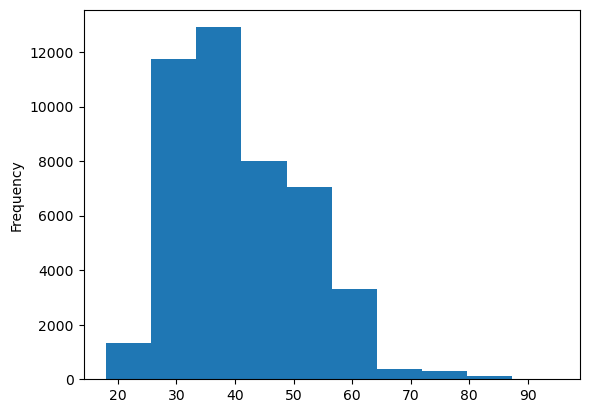

In [305]:
#plot the histogram of age variable.
inp1.age.plot.hist()

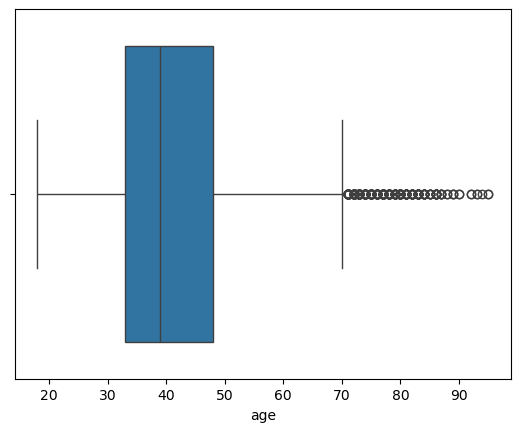

In [306]:
#plot the boxplot of age variable.
#plot the histogram of age variable.
sns.boxplot(data = inp1.age,orient =  "h" )
plt.show()

#### Salary variable 

In [308]:
#describe the salary variable of inp1.


In [309]:
#plot the boxplot of salary variable.


#### Balance variable 

In [311]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

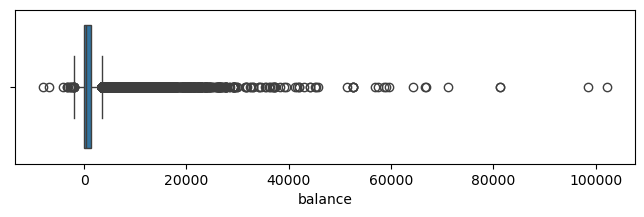

In [312]:
#plot the boxplot of balance variable.
plt.figure(figsize =(8,2))
sns.boxplot(data = inp1.balance,orient="h")
plt.show()

In [313]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [314]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


#### Duration variable

In [316]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [317]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply(lambda x : float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [318]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Univariate analysis of Categorical features

#### Marital status 

In [321]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

marital
married     0.601957
single      0.282943
divorced    0.115099
Name: proportion, dtype: float64

<Axes: ylabel='marital'>

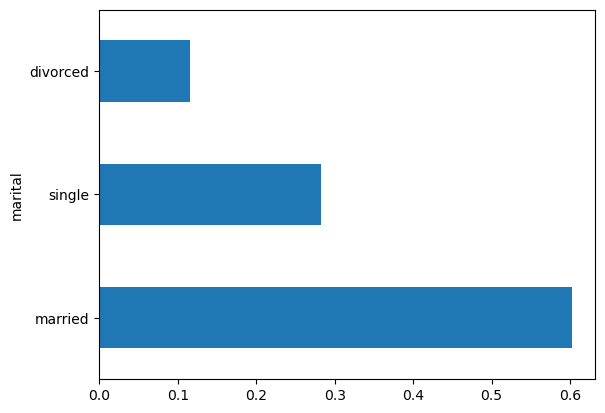

In [322]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot(kind = "barh")

#### Job  

In [324]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

job
blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: proportion, dtype: float64

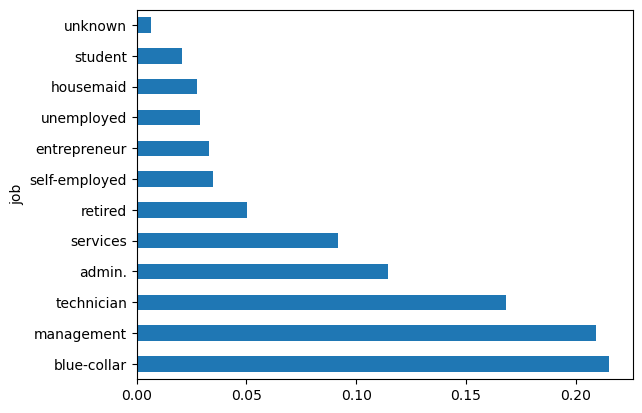

In [325]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Categorical ordered univariate analysis 

#### Education

In [328]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

education
secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: proportion, dtype: float64

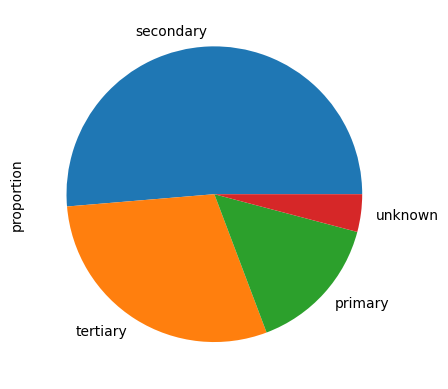

In [329]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

<Axes: xlabel='poutcome'>

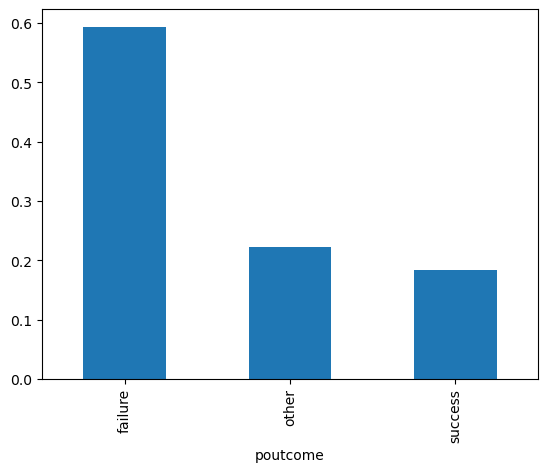

In [331]:
#calculate the percentage of each poutcome category.
inp1.poutcome[~(inp1.poutcome =="unknown")].value_counts(normalize=True).plot.bar()

#### Response the target variable 

In [333]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

response
no     0.882974
yes    0.117026
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

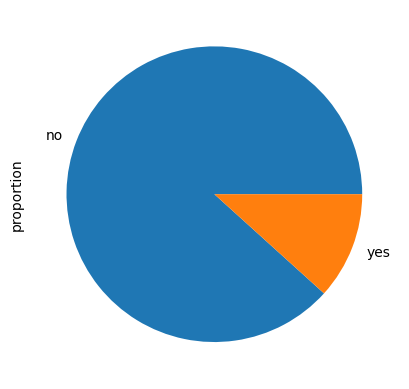

In [334]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()

## Bivariate and Multivariate Analysis

### Numeric- numeric analysis 

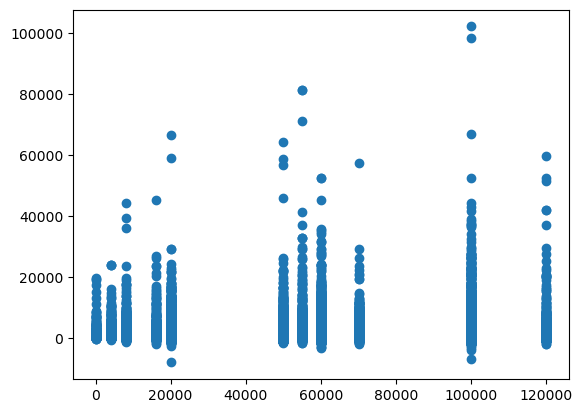

In [337]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary,inp1.balance)
plt.show()


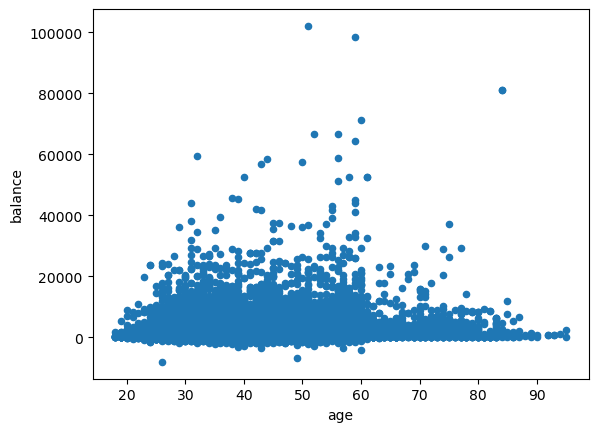

In [338]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x='age',y='balance')
plt.show()

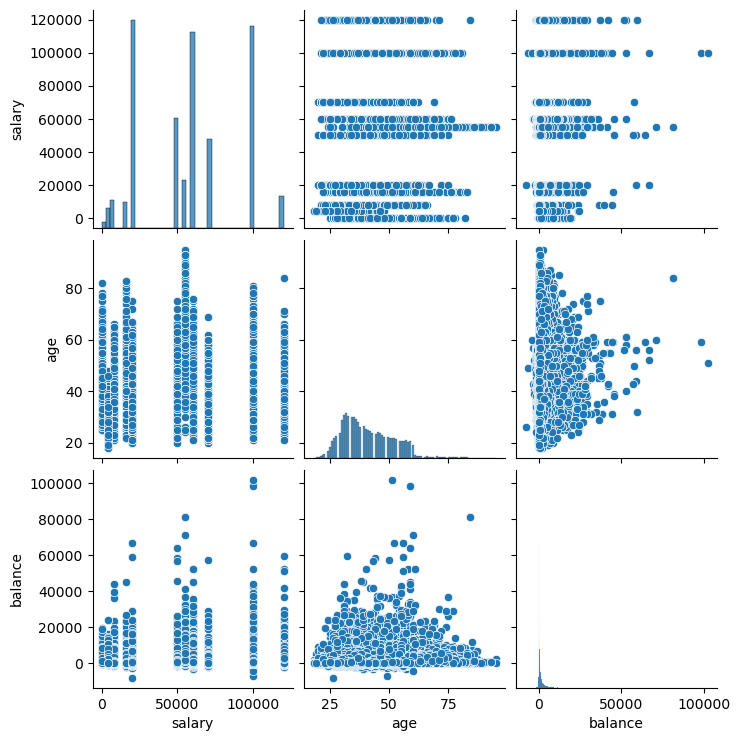

In [339]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=["salary","age","balance"])
plt.show()

#### Correlation heat map 

In [341]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


<Axes: >

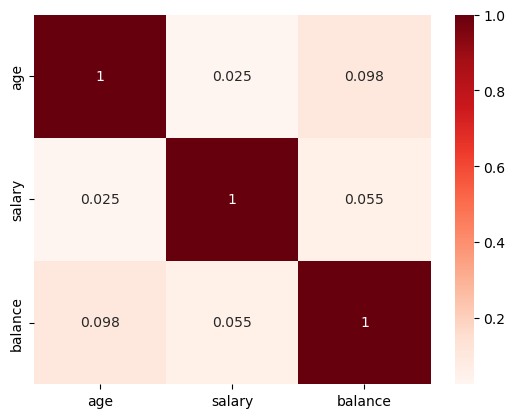

In [342]:
sns.heatmap(inp1[["age","salary","balance"]].corr(), annot =True, cmap="Reds")

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [345]:
#groupby the response to find the mean of the salary with response no & yes separately.
inp1.groupby("response")["salary"].mean()


response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [346]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

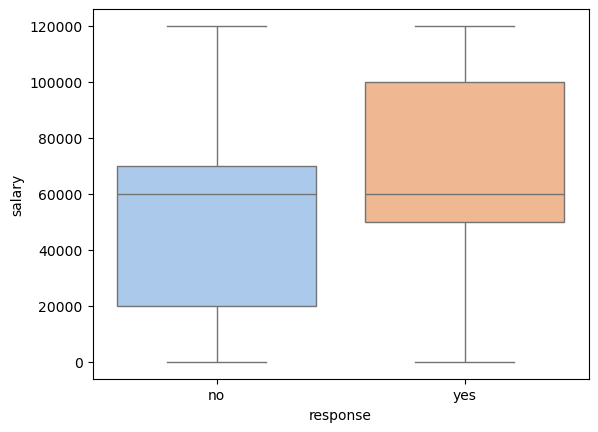

In [347]:
#plot the box plot of salary for yes & no responses.
sns.boxplot( data =inp1, x="response",y="salary",palette="pastel")
plt.show()

#### Balance vs response 

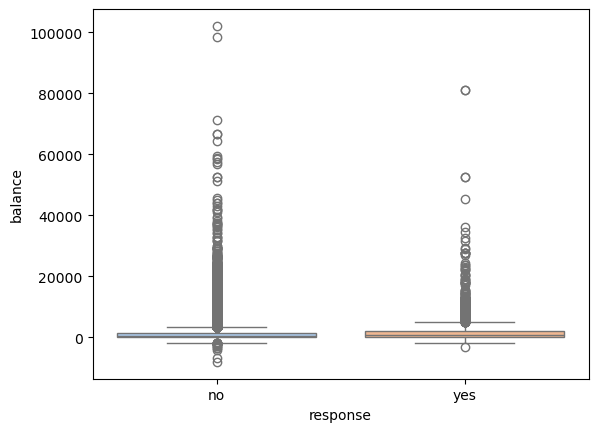

In [349]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data = inp1, x="response", y ="balance", palette = "pastel")
plt.show()

In [350]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [351]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [353]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [354]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<Axes: xlabel='response'>

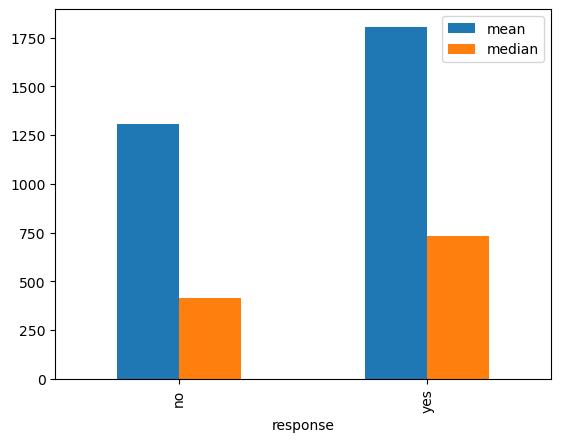

In [355]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar()

#### Education vs salary 

In [357]:
#groupby the education to find the mean of the salary education category.


In [358]:
#groupby the education to find the median of the salary for each education category.


#### Job vs salary

In [360]:
#groupby the job to find the mean of the salary for each job category.


### Segment- 5, Categorical categorical variable 

In [362]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1["response_flag"] = np.where(inp1.response == "yes", 1, 0)

In [363]:
inp1["response_flag"].value_counts()

response_flag
0    39876
1     5285
Name: count, dtype: int64

In [364]:
inp1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [365]:
inp1.response.value_counts(normalize=True)

response
no     0.882974
yes    0.117026
Name: proportion, dtype: float64

In [366]:
inp1.response_flag.mean()

0.1170257523084077

#### Education vs response rate

In [368]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(["education"])["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

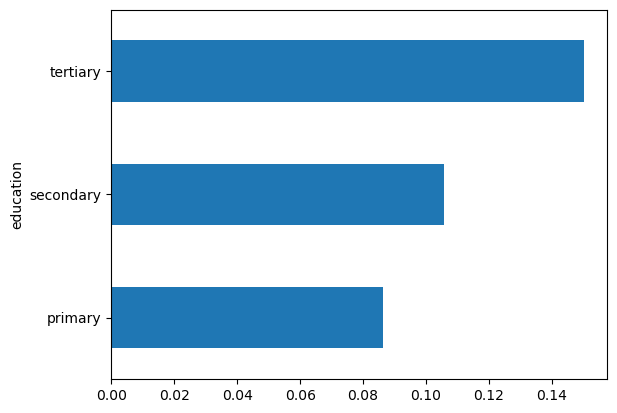

In [369]:
inp1[~(inp1["education"]=="unknown")].groupby(["education"])["response_flag"].mean().plot.barh()
plt.show()

##### Observation: campaing response is more postive as education level increases, Reason might be they have higher income

#### Marital vs response rate 

In [372]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(["marital"])["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

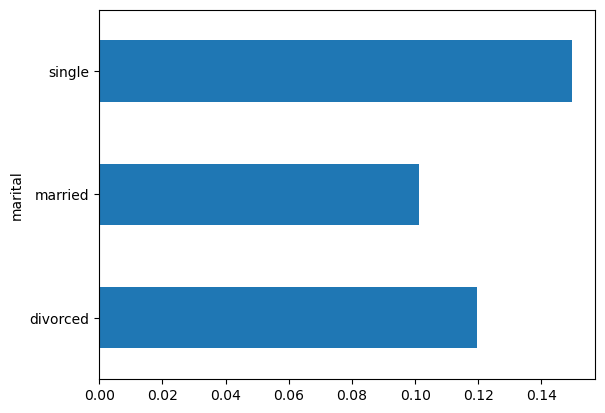

In [373]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()

##### Observation : Married people have least postive responses compared to other categorys, possible reasons : less savings

#### Loans vs response rate 

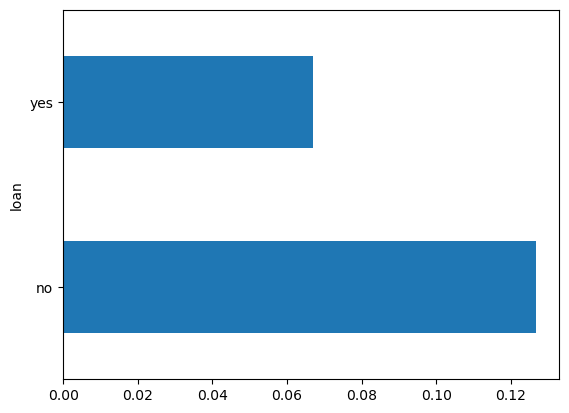

In [376]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(["loan"])["response_flag"].mean().plot.barh()
plt.show()

##### Observation : The people who dont have a loan have high chances of responding positve for the campaign 

#### Housing loans vs response rate 

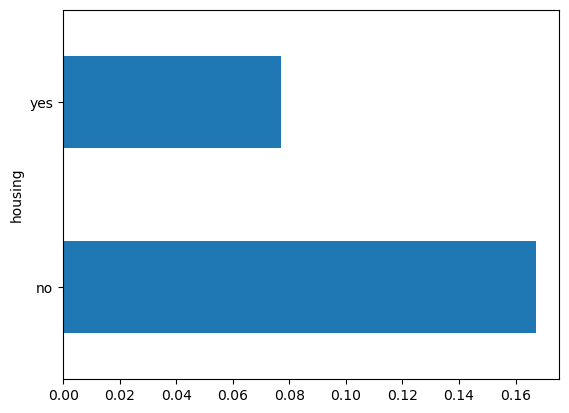

In [379]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(["housing"])["response_flag"].mean().plot.barh()
plt.show()

##### people who have already a home loan are less likely to respond positive

#### Age vs response 

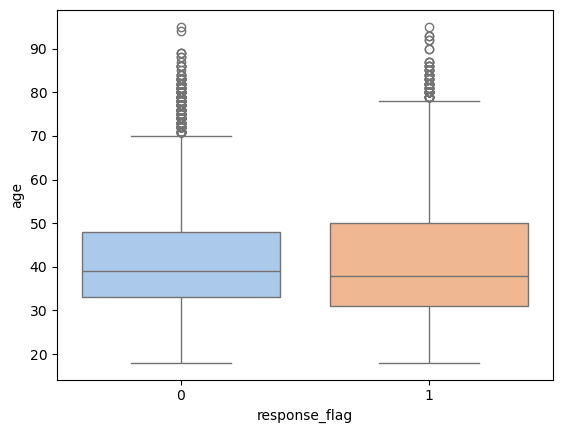

In [483]:
#plot the boxplot of age with response_flag
sns.boxplot(data =inp1, x ="response_flag",y ="age",palette="pastel")
plt.show()


##### making buckets from age columns 

In [491]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_group"]=pd.cut(inp1.age, bins= [0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60","60+"])

In [495]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
inp1.age_group.value_counts(normalize = True)

age_group
30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: proportion, dtype: float64

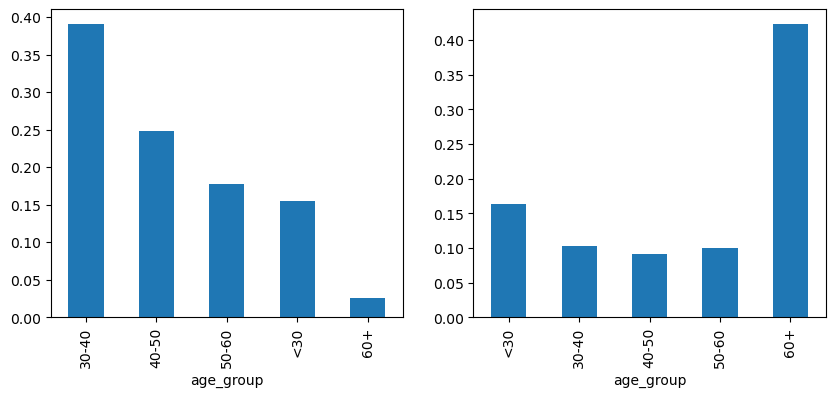

In [503]:
#plot the bar graph of job categories with response_flag mean value.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])["response_flag"].mean().plot.bar()
plt.show()

##### Despite the 60+ age group only had 0.02% response rate, but it has highest POSITIVE response rate among all the age by a big margin 40%+
#### the bank should target the people in the 50+ age group.

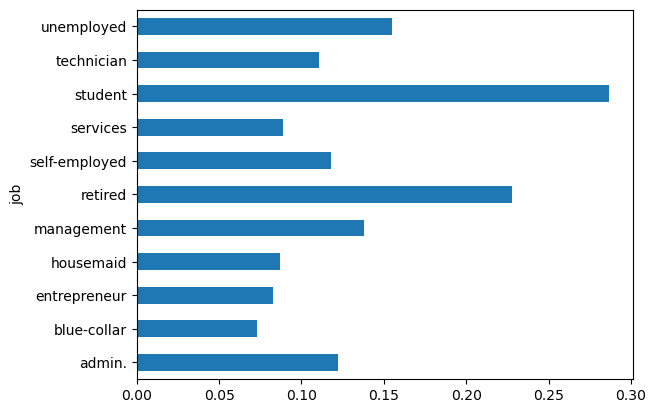

In [515]:
inp1[~(inp1["job"]=="unknown")].groupby(["job"])["response_flag"].mean().plot.barh()
plt.show()

### Segment-6, Multivariate analysis 

In [525]:
res = pd.pivot_table(data = inp1, index="education",columns="marital",values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


#### Education vs marital vs response 

<Axes: xlabel='marital', ylabel='education'>

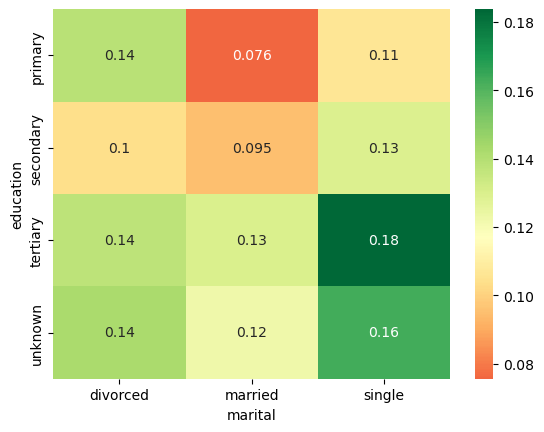

In [533]:
#create heat map of education vs marital vs response_flag
sns.heatmap(res, annot = True, cmap ="RdYlGn",center = 0.117)

#### Observation 
##### : Married people with Primary education has most least responding
##### This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, ##### married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.

#####  Best responses are from Single people with tertiary education

### Job vs marital vs response 

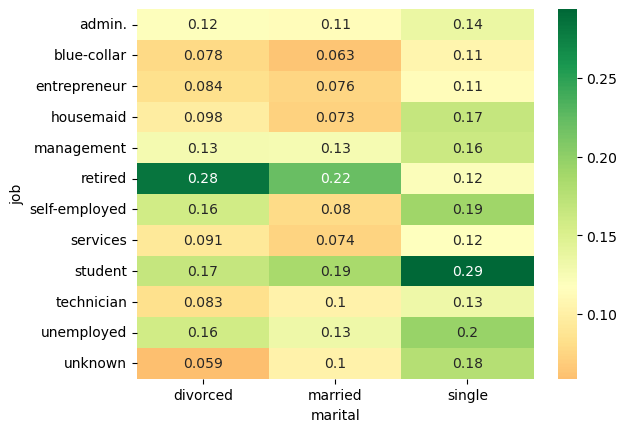

In [540]:
#create the heat map of Job vs marital vs response_flag.
res = pd.pivot_table(data = inp1, index="job",columns="marital",values="response_flag")
sns.heatmap(res, annot = True, cmap ="RdYlGn",center = 0.117)
plt.show()

#### Almost all single audience have response rates in greens according to the heatmap above, Single Students & retired divorced people being the best Target

#### Education vs poutcome vs response

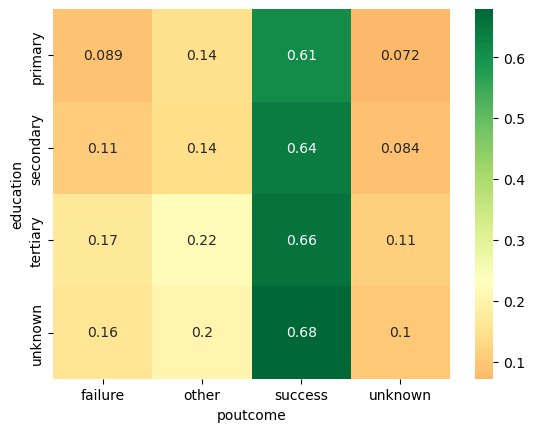

In [550]:
#create the heat map of education vs poutcome vs response_flag.
res = pd.pivot_table(data = inp1, index="education",columns="poutcome",values="response_flag")
sns.heatmap(res, annot = True, cmap ="RdYlGn",center = inp1[inp1.pdays>0].response_flag.mean())
plt.show()

##### People who responded in previous capmaign are more likely to respond , as education increases response rate also increases